***
# <font color=green size=10>ESTATÍSTICA </font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Importação das bibliotecas

In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library(ggplot2)

### Importação do dataset e armazenamento do conteúdo em um DataFrame

In [ ]:
dados <- read.csv("dados.csv")

### Visualização do conteúdo do DataFrame

In [ ]:
head(dados, 5)

### Construção de uma tabela de frequências considerando as classes em salários mínimos (SM)

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### Definição dos intevalos das classes em reais (R$)

In [ ]:
classes <- c(min(dados$Renda), 1576, 3940, 11820, 19700, max(dados$Renda))

### Definição dos labels das classes

In [ ]:
labels <- c("E", "D", "C", "B", "A")

### Construção da coluna de frequências

In [ ]:
frequencia <- table(cut(x = dados$Renda, breaks = classes, labels = labels, include.lowest = TRUE))
frequencia


    E     D     C     B     A 
49755 18602  7241   822   420 

### Construção da coluna de percentuais

In [ ]:
percentual <- prop.table(frequencia) * 100
percentual


         E          D          C          B          A 
64.7514315 24.2087454  9.4234774  1.0697553  0.5465903 

### Colunas de frequência e percentuais juntas e ordenadas de acordo com os labels das classes

In [ ]:
dist_freq_renda <- cbind("Frequência" = frequencia, "Porcentagem (%)" = percentual)

In [ ]:
dist_freq_renda

,Frequência,Porcentagem (%)
E,49755,64.7514315
D,18602,24.2087454
C,7241,9.4234774
B,822,1.0697553
A,420,0.5465903


### Gráfico de barras para visualizar as informações da tabela de frequências acima

In [ ]:
df_dist_freq_renda <- data.frame(dist_freq_renda)

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 5)

In [ ]:
formatos <- theme(plot.title = element_text(size = 20, hjust = 0.5), axis.title.y = element_text(size = 12, vjust = + 0.2), axis.title.x = element_text(size = 12, vjust = - 0.2))

Warning message:
“Use of `df_dist_freq_renda$Frequência` is discouraged. Use `Frequência` instead.”


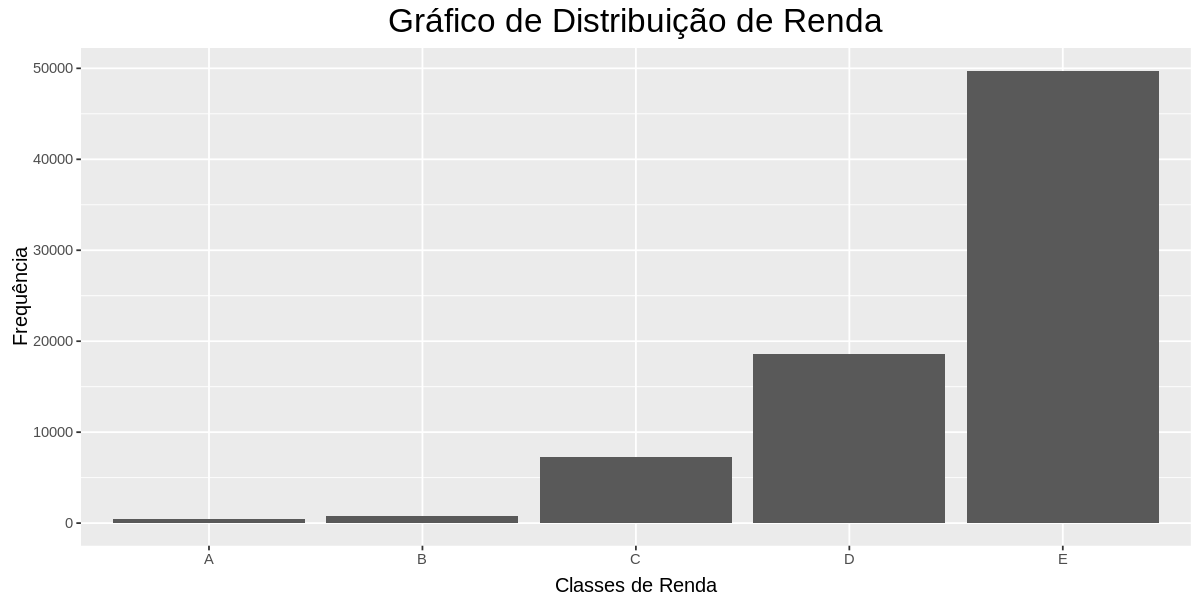

In [ ]:
ggplot(df_dist_freq_renda, aes(x = row.names(df_dist_freq_renda), y = df_dist_freq_renda$`Frequência`)) + geom_bar(stat = "Identity") + ylab("Frequência") + xlab("Classes de Renda") + ggtitle("Gráfico de Distribuição de Renda") + formatos

> ### Conclusões

Se verifica uma discrepância relacionada com a distribuição de renda, onde poucos indivíduos tem uma renda alta e muitos indivíduos tem uma renda de até 2 salários mínimos, onde se destaca, além do fator já mencionado, a variação da classe D (de 2 a 5 salários mínimos) para a E (até 2 salários mínimos) que é de mais da metade, demonstrando a grande distinção do número de indivíduos que ganham até 2 salários mínimos dos demais.

### Histograma para as variáveis QUANTITATIVAS do dataset

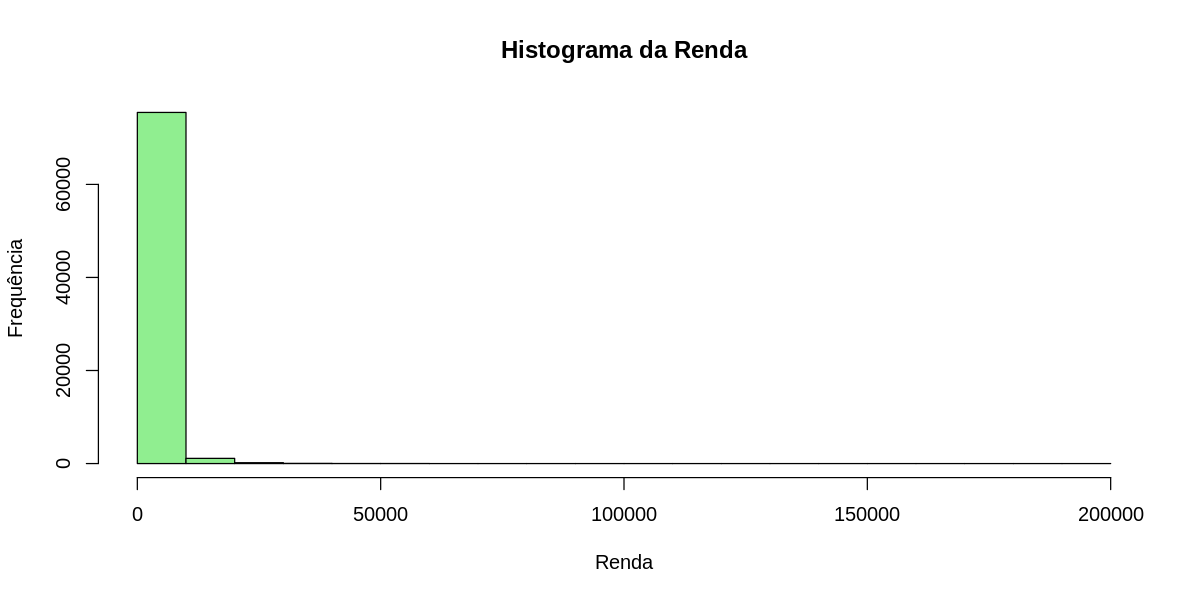

In [ ]:
hist(x = dados$Renda, col = "lightgreen", main = "Histograma da Renda", xlab = "Renda", ylab = "Frequência")

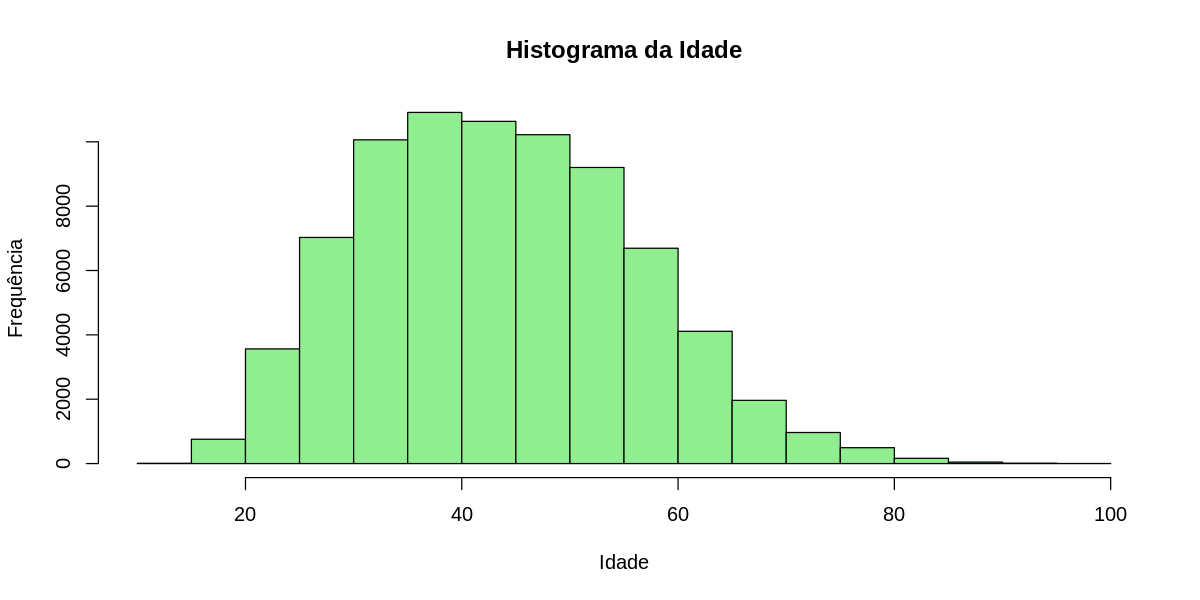

In [ ]:
hist(x = dados$Idade, col = "lightgreen", main = "Histograma da Idade", xlab = "Idade", ylab = "Frequência")

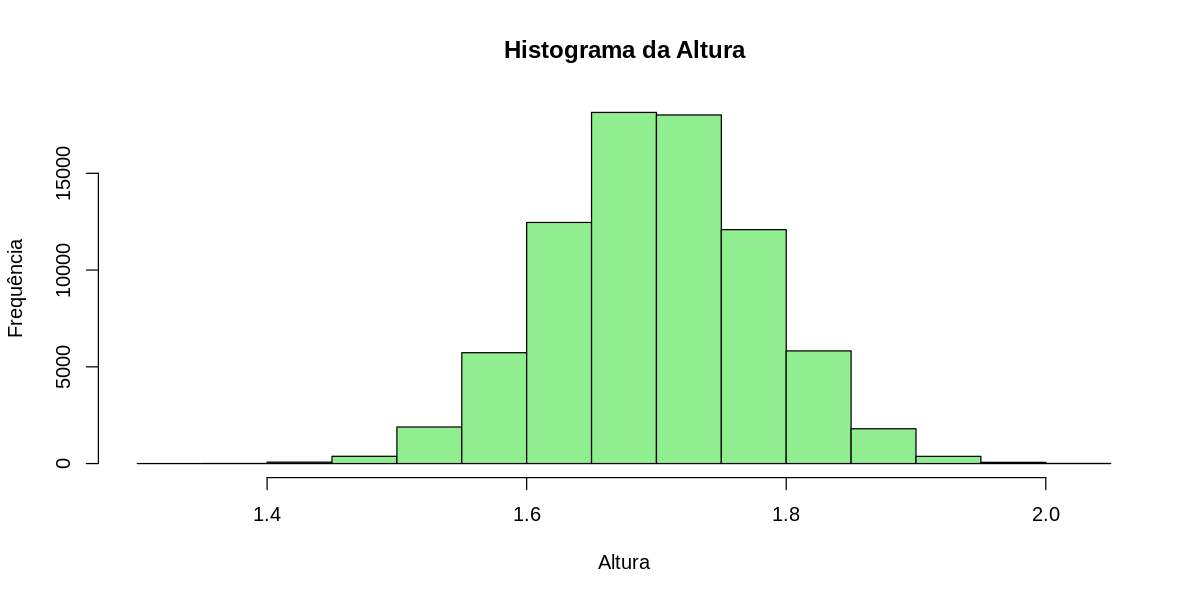

In [ ]:
hist(x = dados$Altura, col = "lightgreen", main = "Histograma da Altura", xlab = "Altura", ylab = "Frequência")

> ### Conclusões

Como já foi mencionado, o histograma reforça a ideia de  discrepância relacionada com a distribuição de renda, onde poucos indivíduos tem uma renda alta e muitos indivíduos tem uma renda de até 2 salários mínimos. Os dados de Idade não são tão discrepantes quanto os dados da renda, apresentando uma certa tendência para a direita na distribuição, o que pode demonstrar a pouca ocorrência de indivíduos de idades mais avançadas que são pessoas de referência no lar devido circunstâncias que possam estar relacionadas com a debilitação natural, doenças, ou até mesmo o óbito. Os dados de altura foram elaborados artificialmente e por isso apresentam uma distribuição mais normalizada, como preferência da elaboração.

### Construção de um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

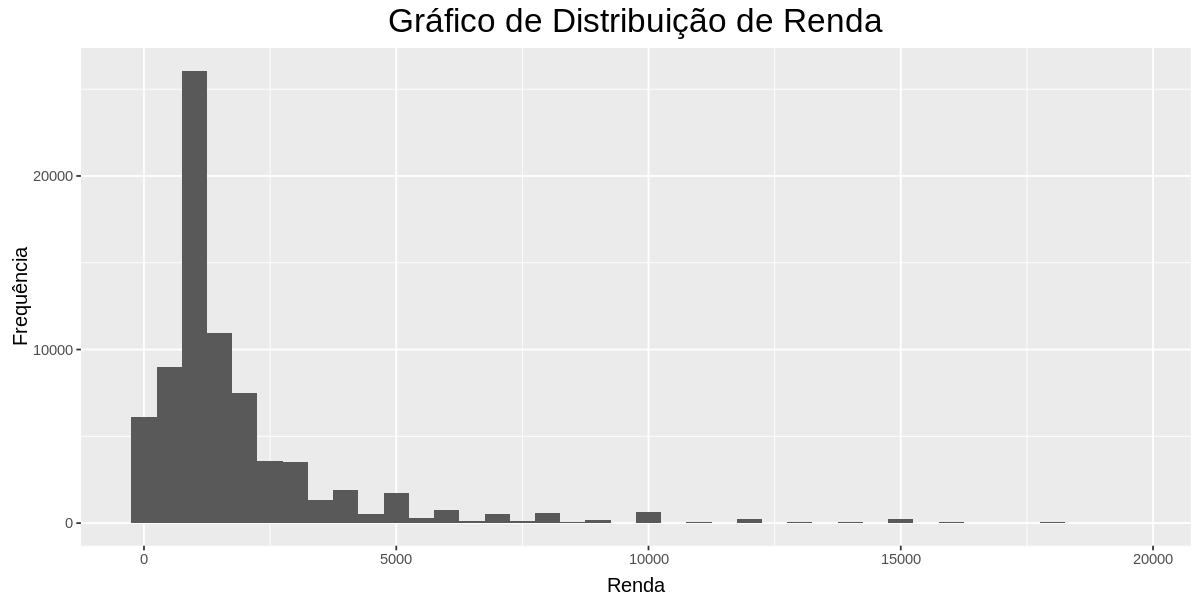

In [ ]:
ggplot(dados[dados$Renda < 20000, ], aes(x = Renda)) + geom_histogram(binwidth = 500) + ylab("Frequência") + xlab("Renda") + ggtitle("Gráfico de Distribuição de Renda") + formatos

### Construção de uma tabela de frequências e de uma tabela com os percentuais cruzando as variáveis SEXO e COR

In [ ]:
sexo = c(
    'Masculino', 
    'Feminino'
)
cor = c(
    'Indígena', 
    'Branca', 
    'Preta', 
    'Amarela', 
    'Parda'
)
anos_de_estudo = c(
    'Sem instrução e menos de 1 ano', 
    '1 ano', 
    '2 anos', 
    '3 anos', 
    '4 anos', 
    '5 anos', 
    '6 anos', 
    '7 anos', 
    '8 anos', 
    '9 anos', 
    '10 anos', 
    '11 anos', 
    '12 anos', 
    '13 anos', 
    '14 anos', 
    '15 anos ou mais', 
    'Não determinados'
)

In [ ]:
frequencia <- table(dados$Sexo, dados$Cor)
colnames(frequencia) <- cor
rownames(frequencia) <- sexo
frequencia

           
            Indígena Branca Preta Amarela Parda
  Masculino      256  22194  5502     235 25063
  Feminino       101   9621  2889     117 10862

In [ ]:
percentual <- prop.table(frequencia) * 100
percentual

           
              Indígena     Branca      Preta    Amarela      Parda
  Masculino  0.3331598 28.8833941  7.1603332  0.3058303 32.6171265
  Feminino   0.1314420 12.5208225  3.7597605  0.1522644 14.1358667

> ### Conclusões

A tabela indica uma maior ocorrência de pessoas brancas e pardas como indivíduos de referência nas residências, além de demonstrar que os homens são os que mais exercem esse papel independente da cor.

## Análise descritiva da variável RENDA

### Média aritmética

In [ ]:
mean(dados$Renda)

[1] 2000.383

### Mediana

In [ ]:
median(dados$Renda)

[1] 1200

### Moda

In [ ]:
moda <- function(x){
  freq <- table(x)
  return (names(freq)[freq == max(freq)])
}

In [ ]:
moda(dados$Renda)

[1] "788"

### Variância

In [ ]:
var(dados$Renda)

[1] 11044906

### Desvio-padrão

In [ ]:
sd(dados$Renda)

[1] 3323.388

### Média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [ ]:
media <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), mean)
colnames(media) <- cor
rownames(media) <- sexo
media

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


In [ ]:
mediana <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), median)
colnames(mediana) <- cor
rownames(mediana) <- sexo
mediana

,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


In [ ]:
maximo <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), max)
colnames(maximo) <- cor
rownames(maximo) <- sexo
maximo

,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

Foi evidenciado uma discrepância de certa forma considerável entre a renda média dos indivíduos de cor amarela dos demais, além de somente as mulheres indígenas receberem valores maiores que os homens indígenas. As medianas relacionadas ao valor da renda continua demonstrando que também é superior para indivíduos de cor amarela, além de demonstrar valores maiores para o sexo masculino independente da cor. O valor máximo da renda demonstra uma superioridade vinculada com a cor parda, além de mostrar que os homens alcançam salários maiores que as mulheres com exceção da cor indígena (o que deixa uma dúvida relacionada ao valor do indivíduo que mais recebe nessa classse de cor estar interferindo em certas medidas de tendência central).

### Medidas de dispersão da variável RENDA segundo SEXO e COR

In [ ]:
variancia <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), var)
colnames(variancia) <- cor
rownames(variancia) <- sexo
variancia

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


In [ ]:
desvio_p <- tapply(dados$Renda, list(dados$Sexo, dados$Cor), sd)
colnames(desvio_p) <- cor
rownames(desvio_p) <- sexo
desvio_p

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


> ### Conclusões

Como previsto, os dados de renda para mulheres indígenas possuem uma variância e desvio padrão bastante alto, indicando que não necessariamente as mulheres indígenas ganham mais do que os homens ou alcançam salários maiores, além disso, os valores das medidas de dispersão dos homens de outra cor também possuem certa variância e desvio padrão maior do que das mulheres, apesar de não ser tão discrepante quanto o das mulheres indígenas e também não ser tão distinta das variâncias e desvio padrão das mulheres de mesma cor.

### Box plot da variável RENDA segundo SEXO e COR

In [ ]:
dados$Cat.Cor <- factor(dados$Cor)
levels(dados$Cat.Cor) <- cor
dados$Cat.Sexo <- factor(dados$Sexo)
levels(dados$Cat.Sexo) <- sexo

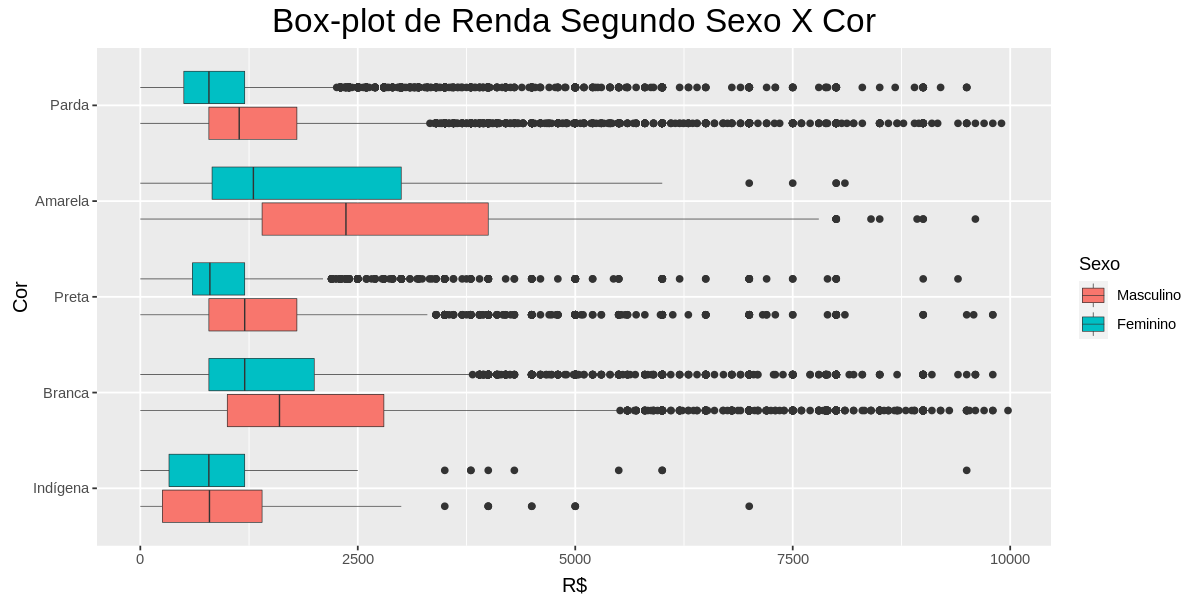

In [ ]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) + geom_boxplot(size = 0.2) + coord_flip() + ylab("R$") + xlab("Cor") + guides(fill = guide_legend(title = "Sexo")) + ggtitle("Box-plot de Renda Segundo Sexo X Cor") + formatos

> ### Conclusões

É identificado uma discrepância entre os valores dos salários dos homens em relação com as mulheres, onde os homens, além de possuírem uma maior região na área do interquartil segundo a representação, ainda se posicionam em direção aos valores maiores, ou seja, na frente das mulheres no eixo x, o que nos faz inferir que mesmo com uma dispersão maior nos dados de renda os homens tem salários maiores que as mulheres.

### Percentual de pessoas do <i>dataset</i> que ganham um salário mínimo (R$ 788,00) ou menos

In [ ]:
length(dados$Renda[dados$Renda <= 788]) / length(dados$Renda) * 100

[1] 28.86778

### Valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>

In [ ]:
centis <- c()
for (i in 1:99){
  centis <- c(centis, i / 100)
}
quantile(dados$Renda, centis)

1%    2%    3%    4%    5%    6%    7%    8%    9%   10%   11%   12%   13% 
    0     0     0    50   100   180   200   280   300   350   400   400   480 
  14%   15%   16%   17%   18%   19%   20%   21%   22%   23%   24%   25%   26% 
  500   500   600   600   700   700   788   788   788   788   788   788   788 
  27%   28%   29%   30%   31%   32%   33%   34%   35%   36%   37%   38%   39% 
  788   788   789   800   800   800   840   870   900   900   920   970  1000 
  40%   41%   42%   43%   44%   45%   46%   47%   48%   49%   50%   51%   52% 
 1000  1000  1000  1000  1014  1100  1100  1150  1200  1200  1200  1200  1200 
  53%   54%   55%   56%   57%   58%   59%   60%   61%   62%   63%   64%   65% 
 1200  1300  1300  1350  1400  1490  1500  1500  1500  1500  1500  1520  1600 
  66%   67%   68%   69%   70%   71%   72%   73%   74%   75%   76%   77%   78% 
 1600  1700  1800  1800  1900  2000  2000  2000  2000  2000  2000  2200  2300 
  79%   80%   81%   82%   83%   84%   85%   86%   87%   88%   89%   90%   91% 
 2400  2500  2500  2600  3000  3000  3000  3000  3400  3500  4000  4000  4200 
  92%   93%   94%   95%   96%   97%   98%   99% 
 5000  5000  5400  6000  7000  8000 10000 15000

### Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [ ]:
media2 <- tapply(dados$Renda, list(dados$Anos.de.Estudo, dados$Sexo), mean)
colnames(media2) <- sexo
rownames(media2) <- anos_de_estudo
media2

,Masculino,Feminino
Sem instrução e menos de 1 ano,799.4946,516.2017
1 ano,895.6290,492.7720
2 anos,931.1790,529.9116
3 anos,1109.2039,546.8539
4 anos,1302.3293,704.2791
5 anos,1338.6532,781.3898
6 anos,1448.8754,833.7328
7 anos,1465.4979,830.7510
8 anos,1639.3967,933.6154
9 anos,1508.0389,868.0217


In [ ]:
mediana2 <- tapply(dados$Renda, list(dados$Anos.de.Estudo, dados$Sexo), median)
colnames(mediana2) <- sexo
rownames(mediana2) <- anos_de_estudo
mediana2

,Masculino,Feminino
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800
9 anos,1200,788


In [ ]:
maximo2 <- tapply(dados$Renda, list(dados$Anos.de.Estudo, dados$Sexo), max)
colnames(maximo2) <- sexo
rownames(maximo2) <- anos_de_estudo
maximo2

,Masculino,Feminino
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000
9 anos,60000,20000


In [ ]:
desvio_p2 <- tapply(dados$Renda, list(dados$Anos.de.Estudo, dados$Sexo), sd)
colnames(desvio_p2) <- sexo
rownames(desvio_p2) <- anos_de_estudo
desvio_p2

,Masculino,Feminino
Sem instrução e menos de 1 ano,1023.9049,639.3115
1 ano,1331.9506,425.2918
2 anos,1435.1738,498.2342
3 anos,2143.8001,424.1244
4 anos,1419.8218,629.5534
5 anos,1484.6506,635.7826
6 anos,1476.6286,574.5470
7 anos,1419.7087,602.0380
8 anos,1515.5837,896.7812
9 anos,2137.6648,973.2217


### Box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [ ]:
dados$Cat.Anos.de.Estudo <- factor(dados$Cor)
levels(dados$Cat.Anos.de.Estudo) <- anos_de_estudo

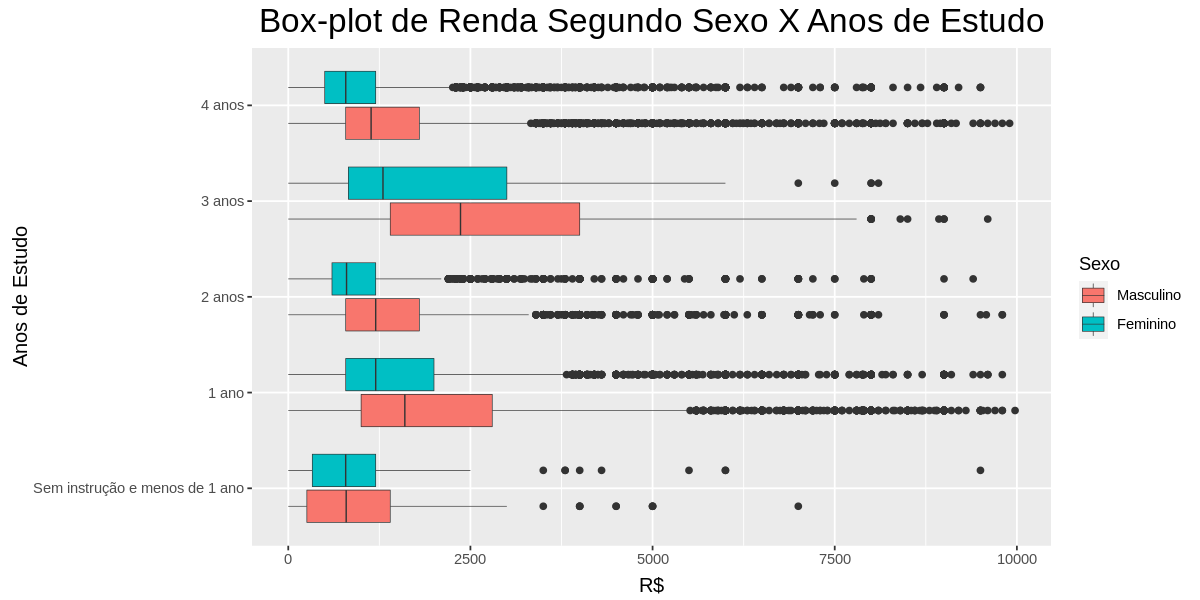

In [ ]:
ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) + geom_boxplot(size = 0.2) + coord_flip() + ylab("R$") + xlab("Anos de Estudo") + guides(fill = guide_legend(title = "Sexo")) + ggtitle("Box-plot de Renda Segundo Sexo X Anos de Estudo") + formatos

> ### Conclusões

É identificado pela representação que independente do grau de educação o cenário continua o mesmo, com os homens ganhando mais que as mulheres.